In [65]:
import pandas as pd
import csv
import numpy as np
import os
from pyecharts.charts import Map

In [66]:
meta_file = "/home/soniali/Desktop/02_china_recom_github/0_raw_data/Qualified_china_meta.csv"
output_path = "/home/soniali/Desktop/02_china_recom_github/1_epi/"
lineage_file = output_path+'lineage_hebing_32.csv'
lineage_count_file = output_path+"china_lineage_num.csv"
date_intervals_day = 10

In [67]:
# 筛选出符合采集时间范围的样本ID
df=pd.read_csv(meta_file,delimiter=',')
# df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')

print(df.shape) # 3064
dict_lineage_hebing = {}
with open(lineage_file) as csvfile:
    csv_reader = csv.reader(csvfile)  
    for row in csv_reader:
        if row[0] != '谱系名':
            lineage_after = row[0]
            linaege_before = row[1].replace(' ','').split(',')
            dict_lineage_hebing[lineage_after] = linaege_before


(39456, 7)


In [68]:
# 在上面新建的一列中填入合并后的谱系
df["merged_lineage"] = np.nan
for k,v in dict_lineage_hebing.items():
    for i in v:
        df.loc[(df.Lineage == i) ,'merged_lineage'] = k          

# not_include = []
# for i in df.index:
#     if df.loc[i,'merged_lineage'] not in dict_lineage_hebing.keys():
#         not_include.append(df.loc[i,'Lineage'] )

# not_include_number =  {}
# for lin in not_include:
#     not_include_number[lin] = not_include.count(lin)

# dict1_sorted_values = sorted(not_include_number.items(),key = lambda x:x[1],reverse = True)
# print(dict1_sorted_values)
# for i in dict1_sorted_values:
#     print(i[0])
# print(dict1_sorted_values.keys())

print(df["merged_lineage"].value_counts())
df_number= df["merged_lineage"].value_counts()
if sum(list(df_number)) == df.shape[0]:
    # df_number.to_csv(lineage_count_file,mode='w')
    print(df_number)
    print("The total number ",str(df.shape[0]))
else:
    print("please check and add the new lineages")

merged_lineage
BA.5.2*      12848
XBB.1.9*      9699
BF.7.14*      5494
XBB.1.16*     3804
XBB.1.5*      1892
XBB.1.22*     1866
Others        1270
BA.2.75*      1066
XBB.2.3*       381
Name: count, dtype: int64
please check and add the new lineages


In [70]:
df['date'] = pd.to_datetime(df['Sample_Collection_Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
df.to_csv("/home/soniali/Desktop/02_china_recom_github/0_raw_data/Qualified_china_meta_merged.txt", index = False)

In [71]:
lineage_count_file

'/home/soniali/Desktop/02_china_recom_github/1_epi/china_lineage_num.csv'

In [72]:
# 筛选出符合采集时间范围的样本ID
meta_file = "/home/soniali/Desktop/02_china_recom_github/0_raw_data/Qualified_china_meta_merged.txt"
df=pd.read_csv(meta_file,delimiter=',')
df['date'] = pd.to_datetime(df['Sample_Collection_Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
df_number= df["merged_lineage"].value_counts()
df_number.to_csv(lineage_count_file,mode='w')

In [8]:
dstart, dend = df['date'].sort_values().values[0], df['date'].sort_values().values[-1]
date_intervals = [str(i)[:10] for n, i in enumerate(pd.date_range(dstart, dend)) if n % date_intervals_day == 0]

In [9]:
#标签按照lineage比例排序,others放最后
lin_rank = df_number.index.tolist()
lin_rank.remove("Others")
lin_rank.append("Others")
select_lin_num = len(lin_rank)
top6_lineages = lin_rank[:select_lin_num]

# 计算每个谱系每天有多少序列
bars = {}
for i in range(select_lin_num):
    bars["top"+str(i+1)] = []

for l, i in enumerate(bars):
    if i != 'Others':
        df_toplin = df[df['merged_lineage'] == top6_lineages[l]]
    else:
        df_toplin = df[~df['merged_lineage'].isin(top6_lineages)]
        
    for n in range(len(date_intervals)):        
        if n != len(date_intervals)-1:
            count = len(df_toplin[
                (df_toplin['date'] >= date_intervals[n]) 
                & (df_toplin['date'] < date_intervals[n + 1])
                ])

        else:
            count = len(df_toplin[
                df_toplin['date'] >= date_intervals[n]
                ])
        bars[i].append(count)

# 计算所有谱系之和，每天总共有多少序列
list_lable = []
for i in range(0,len(bars['top1'])):
    list_lable.append(0)
    for k,v in bars.items():
        list_lable[i] += v[i]

if sum(list_lable) == sum(list(df_number)):
    print("The total genome number is :",str(sum(list_lable)))
    ylim = int(max(list_lable)+max(list_lable)/10)
else:
    print("Something Error!")
    print(sum(list_lable))
    print(sum(list(df_number)))


The total genome number is : 39456


In [10]:
encluded_lineage = df_number.index.tolist()
encluded_lineage.remove("Others")
encluded_lineage


['BA.5.2*',
 'XBB.1.9*',
 'BF.7.14*',
 'XBB.1.16*',
 'XBB.1.5*',
 'XBB.1.22*',
 'BA.2.75*',
 'XBB.2.3*']

In [11]:
df

Virus Strain Name      Accession_ID   
0      hCoV-19/Hong Kong/HK-HKPU-PUN685603612/2022  EPI_ISL_17581918  \
1      hCoV-19/Hong Kong/HK-HKPU-PUN685604139/2022  EPI_ISL_17581917   
2      hCoV-19/Hong Kong/HK-HKPU-PUN530943185/2022  EPI_ISL_17581655   
3      hCoV-19/Hong Kong/HK-HKPU-PUN530858013/2022  EPI_ISL_17581654   
4      hCoV-19/Hong Kong/HK-HKPU-PUN533268292/2022  EPI_ISL_17581653   
...                                            ...               ...   
39451            hCoV-19/Fujian/FCDC-XM101811/2023  EPI_ISL_18495157   
39452              hCoV-19/Sichuan/DYCDC-0212/2023  EPI_ISL_18494998   
39453           hCoV-19/Sichuan/MYCDC-XGCX433/2023  EPI_ISL_18494064   
39454              hCoV-19/Fujian/FCDC-NP2706/2023  EPI_ISL_18464942   
39455              hCoV-19/Fujian/FCDC-NP2724/2023  EPI_ISL_18464941   

        Lineage Sample_Collection_Date country   province      city   
0        BN.3.1              12/1/2022   China  Hong Kong       NaN  \
1        BN.3.1              12/1/2022   China  Hong Kong       NaN   
2        BQ.1.1              12/1/2022   China  Hong Kong       NaN   
3        BA.5.2              12/1/2022   China  Hong Kong       NaN   
4        BA.5.2              12/1/2022   China  Hong Kong       NaN   
...         ...                    ...     ...        ...       ...   
39451      HK.1             10/31/2023   China     Fujian    Xiamen   
39452      HK.2             10/31/2023   China    Sichuan    Deyang   
39453      HK.3             10/31/2023   China    Sichuan  Mianyang   
39454  EG.5.1.1             10/31/2023   China     Fujian   Nanping   
39455      HK.2             10/31/2023   China     Fujian   Nanping   

      merged_lineage        date  
0           BA.2.75*  2022-12-01  
1           BA.2.75*  2022-12-01  
2             Others  2022-12-01  
3            BA.5.2*  2022-12-01  
4            BA.5.2*  2022-12-01  
...              ...         ...  
39451       XBB.1.9*  2023-10-31  
39452       XBB.1.9*  2023-10-31  
39453       XBB.1.9*  2023-10-31  
39454       XBB.1.9*  2023-10-31  
39455       XBB.1.9*  2023-10-31  

[39456 rows x 9 columns]

In [12]:
for i in df.index:
    if df.loc[i,"province"] == "Inner mongolia":
        df.loc[i,"province"] = "Inner Mongolia"
    elif df.loc[i,"province"] == "Xinjiang corps":
        df.loc[i,"province"] = "Xinjiang"
    elif df.loc[i,"province"] == "Harbin":
        df.loc[i,"province"] = "Heilongjiang"
    elif df.loc[i,"province"] == "Tibet":
        df.loc[i,"province"] = "Xizang"
    elif df.loc[i,"province"] == "Nanning":
        df.loc[i,"province"] = "Guangxi"
        
cities_english = set(df.province.tolist())

In [13]:
set(list(df.province))

{'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Taiwan',
 'Tianjin',
 'Xinjiang',
 'Xizang',
 'Yunnan',
 'Zhejiang'}

In [15]:
cities_EC = {'Anhui':'安徽省','Beijing':'北京市','Chongqing':'重庆市','Fujian':'福建省','Gansu':'甘肃省','Guangdong':'广东省','Guangxi':'广西壮族自治区','Guizhou':'贵州省','Hainan':'海南省','Hebei':'河北省','Heilongjiang':'黑龙江省','Henan':'河南省','Hong Kong':'香港省','Hubei':'湖北省','Hunan':'湖南省','Inner Mongolia':'内蒙古自治区','Jiangsu':'江苏省','Jiangxi':'江西省','Jilin':'吉林省','Liaoning':'辽宁省','Ningxia':'宁夏回族自治区','Qinghai':'青海省','Shandong':'山东省','Shanghai':'上海市','Shanxi':'山西省','Shaanxi':'陕西省','Sichuan':'四川省','Taiwan':'台湾省','Tianjin':'天津市','Xinjiang':'新疆维吾尔族自治区','Xizang':'西藏自治区','Yunnan':'云南省','Zhejiang':'浙江省'}

city_genome = {}
for city in set(list(df.province)):
    df_city = df[df['province'] == city]
    city_genome[cities_EC[city]] = df_city.shape[0]

In [16]:
city_genome

{'宁夏回族自治区': 60,
 '湖北省': 2456,
 '天津市': 255,
 '陕西省': 295,
 '香港省': 641,
 '福建省': 2636,
 '内蒙古自治区': 207,
 '广西壮族自治区': 268,
 '四川省': 2862,
 '河北省': 644,
 '青海省': 357,
 '西藏自治区': 2,
 '海南省': 457,
 '江苏省': 1318,
 '山东省': 1185,
 '湖南省': 80,
 '台湾省': 962,
 '辽宁省': 326,
 '北京市': 1001,
 '吉林省': 196,
 '重庆市': 188,
 '上海市': 9274,
 '云南省': 1965,
 '浙江省': 1311,
 '广东省': 1945,
 '山西省': 538,
 '河南省': 1650,
 '安徽省': 1736,
 '江西省': 951,
 '黑龙江省': 1254,
 '甘肃省': 1063,
 '贵州省': 106,
 '新疆维吾尔族自治区': 1267}

In [17]:
sum(city_genome.values())

39456

## 绘制省市谱系热图

In [18]:
all_province = set(df["province"].tolist())
# top6_lineages.remove("Others")

In [19]:
province_lineage = {}
for p in all_province:
    province_lineage[p] = {}
province_all = {}
for p in all_province:
    df1 = df[df["province"] == p]
    province_all[p] = df1.shape[0]
    for l in top6_lineages:
        df2 = df1[df1["merged_lineage"] == l]
        province_lineage[p][l] = df2.shape[0]

In [20]:
df_heatmap = pd.DataFrame(columns=list(all_province),index=top6_lineages )
for l in df_heatmap.index:
    for p in all_province:
        df_heatmap.loc[l,p] = province_lineage[p][l]/province_all[p]

In [22]:
for i in df_heatmap.index:
    for j in df_heatmap.loc[i,]:
        if type(j) != float:
            print(j)

df_heatmap_plot = pd.DataFrame(df_heatmap, dtype="float")
df_heatmap_plot

Ningxia     Hubei   Tianjin   Shaanxi  Hong Kong    Fujian   
BA.5.2*    0.733333  0.528094  0.443137  0.552542   0.166927  0.378604  \
XBB.1.9*   0.000000  0.271580  0.090196  0.000000   0.112324  0.273141   
BF.7.14*   0.266667  0.052117  0.392157  0.430508   0.045242  0.180577   
XBB.1.16*  0.000000  0.024430  0.015686  0.000000   0.059282  0.070182   
XBB.1.5*   0.000000  0.027280  0.003922  0.003390   0.034321  0.025417   
XBB.1.22*  0.000000  0.081840  0.003922  0.000000   0.010920  0.025797   
BA.2.75*   0.000000  0.005700  0.011765  0.003390   0.313573  0.015554   
XBB.2.3*   0.000000  0.001629  0.003922  0.000000   0.012480  0.020865   
Others     0.000000  0.007329  0.035294  0.010169   0.244930  0.009863   

           Inner Mongolia   Guangxi   Sichuan     Hebei  ...  Zhejiang   
BA.5.2*          0.449275  0.645522  0.221873  0.574534  ...  0.575133  \
XBB.1.9*         0.009662  0.000000  0.566387  0.004658  ...  0.038139   
BF.7.14*         0.516908  0.313433  0.085255  0.411491  ...  0.315027   
XBB.1.16*        0.000000  0.003731  0.047869  0.000000  ...  0.014493   
XBB.1.5*         0.024155  0.000000  0.031097  0.001553  ...  0.015256   
XBB.1.22*        0.000000  0.000000  0.018868  0.000000  ...  0.008391   
BA.2.75*         0.000000  0.037313  0.013627  0.000000  ...  0.012967   
XBB.2.3*         0.000000  0.000000  0.001747  0.000000  ...  0.003051   
Others           0.000000  0.000000  0.013277  0.007764  ...  0.017544   

           Guangdong    Shanxi     Henan     Anhui   Jiangxi  Heilongjiang   
BA.5.2*     0.577892  0.399628  0.429091  0.380184  0.203996      0.415470  \
XBB.1.9*    0.146530  0.200743  0.327879  0.119240  0.352261      0.208931   
BF.7.14*    0.137275  0.262082  0.117576  0.178571  0.055731      0.233652   
XBB.1.16*   0.046787  0.046468  0.051515  0.047811  0.238696      0.052632   
XBB.1.5*    0.037532  0.026022  0.018182  0.052995  0.067298      0.023923   
XBB.1.22*   0.003599  0.026022  0.034545  0.130760  0.025237      0.010367   
BA.2.75*    0.031877  0.020446  0.006667  0.009793  0.025237      0.028708   
XBB.2.3*    0.004627  0.000000  0.001818  0.011521  0.007361      0.001595   
Others      0.013882  0.018587  0.012727  0.069124  0.024185      0.024721   

              Gansu   Guizhou  Xinjiang  
BA.5.2*    0.503293  0.396226  0.458564  
XBB.1.9*   0.275635  0.424528  0.262036  
BF.7.14*   0.049859  0.103774  0.058406  
XBB.1.16*  0.025400  0.056604  0.052092  
XBB.1.5*   0.082785  0.000000  0.052092  
XBB.1.22*  0.029163  0.000000  0.025257  
BA.2.75*   0.010348  0.009434  0.013418  
XBB.2.3*   0.004704  0.000000  0.002368  
Others     0.018815  0.009434  0.075770  

[9 rows x 33 columns]

In [23]:
for p in all_province:
    print(sum(df_heatmap[p]))


1.0
0.9999999999999999
0.9999999999999999
0.9999999999999998
0.9999999999999999
1.0000000000000002
0.9999999999999999
1.0
1.0
1.0000000000000002
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
0.9999999999999998
0.9999999999999998
1.0
0.9999999999999999
1.0
1.0
0.9999999999999998
1.0
1.0
1.0
0.9999999999999997


In [24]:
df_heatmap_plot_T = df_heatmap_plot.T
df_heatmap_plot_T.to_csv(output_path+"region_lin_frequency_heatmap.csv")

# Run region_lin_frequency_heatmap.r in R studio

## 绘制全国地图

In [25]:
city_genome

{'宁夏回族自治区': 60,
 '湖北省': 2456,
 '天津市': 255,
 '陕西省': 295,
 '香港省': 641,
 '福建省': 2636,
 '内蒙古自治区': 207,
 '广西壮族自治区': 268,
 '四川省': 2862,
 '河北省': 644,
 '青海省': 357,
 '西藏自治区': 2,
 '海南省': 457,
 '江苏省': 1318,
 '山东省': 1185,
 '湖南省': 80,
 '台湾省': 962,
 '辽宁省': 326,
 '北京市': 1001,
 '吉林省': 196,
 '重庆市': 188,
 '上海市': 9274,
 '云南省': 1965,
 '浙江省': 1311,
 '广东省': 1945,
 '山西省': 538,
 '河南省': 1650,
 '安徽省': 1736,
 '江西省': 951,
 '黑龙江省': 1254,
 '甘肃省': 1063,
 '贵州省': 106,
 '新疆维吾尔族自治区': 1267}

In [26]:
city_genome.pop("上海市")

9274

In [27]:
preserve_province = ['Shanghai',"Guangdong","Sichuan","Fujian","Hubei","Yunnan","Henan","Xinjiang","Anhui","Jiangsu","Heilongjiang","Gansu"\
    "Zhejiang","Beijing","Shandong","Taiwan","Jiangxi"]
for i in df.index:
    if df.loc[i,"province"] in preserve_province:
        continue
    else:
        df.loc[i,"province"] = "Others"

# df.to_csv('/home/soniali/Desktop/02_china_recom/0_raw_data/Qualified_china_meta_merged2.txt',index = None)

In [28]:
sum(list(city_genome.values()))


30182

In [29]:
df_sample = pd.DataFrame(columns=["region","name","value"])
df_sample["region"] = ["China"]*len(city_genome)
df_sample["name"] = list(city_genome.keys())
df_sample["value"] = list(city_genome.values())
df_sample.to_csv(output_path+"China_except_sh.csv",index=None)

# Run region_lin_frequency_heatmap.r in R studio

In [30]:
# from pyecharts.charts import Map
# from pyecharts import options as opts
# from pyecharts.faker import Faker
# import os
# import numpy

# city_lin = list(city_genome.keys())
# values2 = list(city_genome.values())
# # values2 = numpy.log(list(city_genome.values()))
# max_num = max(values2)
# c = (
#     Map()
#     .add("china", [list(z) for z in zip(city_lin, values2)],maptype="china",is_map_symbol_show=False,)
#     .set_series_opts(label_opts=opts.LabelOpts(is_show=False)) #不显示标签（城市名）
#     .set_global_opts(
#         title_opts=opts.TitleOpts(title="China_except_sh"), visualmap_opts=opts.VisualMapOpts(max_=max_num,is_piecewise=False,range_color=["#F0F0F0", "#DF0101"]),
#         # title_opts=opts.TitleOpts(title="China"), visualmap_opts=opts.VisualMapOpts(range_color=["#FBEFEF", "#DF0101"]),
#     )
#     .render(output_path+"China_except_sh"+str(date_intervals_day)+"d.html")
# )

In [31]:
cities_chinese = ['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan', 'Tianjin', 'Xinjiang', 'Xizang', 'Yunnan', 'Zhejiang']
cities_EC = {'Anhui':'安徽省','Beijing':'北京市','Chongqing':'重庆市','Fujian':'福建省','Gansu':'甘肃省','Guangdong':'广东省','Guangxi':'广西壮族自治区','Guizhou':'贵州省','Hainan':'海南省','Hebei':'河北省','Heilongjiang':'黑龙江省','Henan':'河南省','Hong Kong':'香港省','Hubei':'湖北省','Hunan':'湖南省','Inner Mongolia':'内蒙古自治区','Jiangsu':'江苏省','Jiangxi':'江西省','Jilin':'吉林省','Liaoning':'辽宁省','Ningxia':'宁夏回族自治区','Qinghai':'青海省','Shandong':'山东省','Shanghai':'上海市','Shanxi':'山西省','Shaanxi':'陕西省','Sichuan':'四川省','Taiwan':'台湾省','Tianjin':'天津市','Xinjiang':'新疆维吾尔族自治区','Xizang':'西藏自治区','Yunnan':'云南省','Zhejiang':'浙江省'}

lin_city_num = {}
for lin in encluded_lineage:
    lin_city_num[lin] = {}
    for city in cities_english:
        lin_city_num[lin][cities_EC[city]] = 0

for city in cities_english:
    df_city = df[df['province'] == city]
    for i in df_city.index:
        lin = df_city.loc[i,"merged_lineage"]
        if lin != "Others":
            lin_city_num[lin][cities_EC[city]] += 1



In [33]:
import matplotlib.pyplot as plt
import numpy as np

# plt.cla()
fig, ax = plt.subplots(1, 1, figsize=(100,50), dpi=300)
colors = ["#C5432E","#82ADCF","#5D9488","#F0B26D","#9372A9","#F4D586","#4F72B1","#B7D7E9","#9C9A99"]
for i in range(select_lin_num):
    if i == 0:
        plt.bar(date_intervals, bars["top1"], label=top6_lineages[i], color=colors[i], edgecolor='black', width=0.6, alpha=0.6)
    elif i == 1:
        plt.bar(date_intervals, bars["top2"], bottom=bars["top1"], label=top6_lineages[i], color=colors[i], edgecolor='black', width=0.6, alpha=0.6)
        accumu_height = np.add(bars["top1"], bars["top2"]).tolist()
    else:
        plt.bar(date_intervals, bars["top"+str(i+1)], bottom=accumu_height, label=top6_lineages[i], color=colors[i], edgecolor='black', width=0.6, alpha=0.6)
        accumu_height = np.add(accumu_height, bars["top"+str(i+1)]).tolist()

plt.legend(fontsize=60)
plt.xticks([date_intervals[n] for n in range(len(date_intervals)) if n % round(len(date_intervals) / date_intervals_day) == 0])

plt.yticks(size=90,weight='bold')
plt.xticks(size=70)

plt.ylim(0, ylim) 
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=15,ha='right',fontweight = "bold")
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.tick_params(width=8,length=15)

plt.title('Temporal distribution in China',size=120, fontdict={'family': 'Songti SC', 'weight': 'bold'})        #设置标题
plt.ylabel('Genomes',size=90, fontdict={'family': 'Songti SC', 'weight': 'bold'})

plt.savefig(output_path+"lineage_china_"+str(date_intervals_day)+"day.pdf")

plt.show()

findfont: Font family ['Songti SC'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Songti SC'] not found. Falling back to DejaVu Sans.


In [36]:
all_top = list(set(bars.keys()))
bars_prop = {}
for n in all_top:
    bars_prop[n] = []

for i in range(len(bars["top1"])):
    temp_n = []
    for n in all_top:
        temp_n.append(bars[n][i])
    pp = [a/sum(temp_n) for a in temp_n]
    for b in range(len(all_top)):
        bars_prop[all_top[b]].append(pp[b])

for n in range(len(bars_prop["top9"])):
    num = 0
    for top in all_top:
        num+=bars_prop[top][n]
    print(num)

1.0000000000000002
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0


In [37]:
import matplotlib.pyplot as plt
import numpy as np

# plt.cla()
fig, ax = plt.subplots(1, 1, figsize=(100,50), dpi=300)
accumu_height = []
for i in range(select_lin_num):
    if i == 0:
        plt.bar(date_intervals, bars_prop["top1"], label=top6_lineages[i], color=colors[i], edgecolor='black', width=0.6, alpha=0.6)
    elif i == 1:
        plt.bar(date_intervals, bars_prop["top2"], bottom=bars_prop["top1"], label=top6_lineages[i], color=colors[i], edgecolor='black', width=0.6, alpha=0.6)
        accumu_height = np.add(bars_prop["top1"], bars_prop["top2"]).tolist()
    else:
        plt.bar(date_intervals, bars_prop["top"+str(i+1)], bottom=accumu_height, label=top6_lineages[i], color=colors[i], edgecolor='black', width=0.6, alpha=0.6)
        accumu_height = np.add(accumu_height, bars_prop["top"+str(i+1)]).tolist()

plt.legend(fontsize=60)
plt.xticks([date_intervals[n] for n in range(len(date_intervals)) if n % round(len(date_intervals) / 10) == 0])

plt.yticks(size=90,weight='bold')
plt.xticks(size=70)
plt.ylim(0, 1.01) 
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=15,ha='right',fontweight = "bold")

plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.tick_params(width=8,length=15)
plt.title('Temporal distribution in China',size=120, fontdict={'family': 'Songti SC', 'weight': 'bold'}) 

plt.ylabel('Frequency',size=90, fontdict={'family': 'Songti SC', 'weight': 'bold'})
plt.savefig(output_path+"lineage_china_prop_"+str(date_intervals_day)+"day.pdf")
plt.show()

In [38]:
top6_lineages = ['BA.5.2*','XBB.1.9*','BF.7.14*','XBB.1.16*','XBB.1.5*','XBB.1.22*']
top6_lin = top6_lineages[:6]

In [40]:
import os
os.mkdir(output_path+"world_covspectrum/")
#绘制top6谱系的增长曲线图
top6_lin = top6_lineages[:6]
df1 = df.sort_values(by="date" , ascending=True)
dstart, dend = df1['date'].sort_values().values[0], df1['date'].sort_values().values[-1]
date_intervals = [str(i)[:10] for n, i in enumerate(pd.date_range(dstart, dend)) if n % 1 == 0]

date_lin_prop = {}
for day in date_intervals:
    date_lin_prop[day] = {}
    for lin in top6_lin:
        date_lin_prop[day][lin] = 0
        
for day in date_intervals:
    df_day = df1[df1["date"] == day]
    if df_day.shape[0] != 0:
        df_top1 = df_day[df_day["merged_lineage"] == top6_lin[0]]
        for i in range(len(top6_lin)):
            date_lin_prop[day][top6_lin[i]] = (df_day[df_day["merged_lineage"] == top6_lin[i]]).shape[0]/df_day.shape[0]
    else:
        for i in range(len(top6_lin)):
            date_lin_prop[day][top6_lin[i]] = 0

df_prop = pd.DataFrame(columns=["date","proportion","variant"])
df_prop.date = [val for val in date_intervals for i in range(len(top6_lin))]
df_prop.variant = top6_lin*len(date_intervals)

for i in df_prop.index:
    day = df_prop.loc[i,"date"]
    lin = df_prop.loc[i,"variant"]
    df_prop.loc[i,"proportion"] = date_lin_prop[day][lin]

df_prop.to_csv(output_path+"world_covspectrum/Top6_china.csv",index=None)

In [41]:
# df_prop = pd.read_csv("/home/soniali/Desktop/02_china_recom/1_epi/world_covspectrum/Top6_china.csv")
df_prop

date proportion    variant
0     2022-12-01   0.719403    BA.5.2*
1     2022-12-01        0.0   XBB.1.9*
2     2022-12-01   0.226866   BF.7.14*
3     2022-12-01        0.0  XBB.1.16*
4     2022-12-01        0.0   XBB.1.5*
...          ...        ...        ...
2005  2023-10-31        1.0   XBB.1.9*
2006  2023-10-31        0.0   BF.7.14*
2007  2023-10-31        0.0  XBB.1.16*
2008  2023-10-31        0.0   XBB.1.5*
2009  2023-10-31        0.0  XBB.1.22*

[2010 rows x 3 columns]

In [42]:
from numpy import *
import matplotlib.pyplot as plt  
os.chdir(os.getcwd()+"/")

def nihe(x, y, deg, color):
    parameter = np.polyfit(x, y, deg)
    p = np.poly1d(parameter)
    plt.plot(x, p(x), color=color)
    
    
def bord_line(ax, bwith, line_color):
    ax.spines['top'].set_color(line_color)  
    ax.spines['right'].set_color(line_color)
    ax.spines['left'].set_color(line_color)
    ax.spines['bottom'].set_color(line_color)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['bottom'].set_linewidth(bwith)
    
    
dstart, dend = df_prop['date'].sort_values().values[0], df_prop['date'].sort_values().values[-1]
date_intervals_top4 = [str(i)[:10] for n, i in enumerate(pd.date_range(dstart, dend)) if n % date_intervals_day == 0]
df_prop_week = pd.DataFrame(columns=["date","proportion","variant"])
df_prop_week.date = [val for val in date_intervals_top4 for i in range(len(top6_lin))]
df_prop_week.variant = top6_lin*len(date_intervals_top4)
for n in range(len(date_intervals_top4)):
    if n != len(date_intervals_top4)-1:
        df_week1 = df_prop[df_prop['date'] >= date_intervals_top4[n]]
        df_week2 = df_week1[df_week1['date'] < date_intervals_top4[n+1]]
    else:
        df_week2 = df_prop[df_prop['date'] >= date_intervals_top4[n]]
    for lin in top6_lin:
        df_week2_lin = df_week2[df_week2['variant']  == lin]
        for i in df_prop_week.index:
            if df_prop_week.loc[i,"variant"] == lin and df_prop_week.loc[i,"date"] == date_intervals_top4[n]:
                df_prop_week.loc[i,"proportion"]  = sum(df_week2_lin.proportion)/date_intervals_day

In [43]:
df_prop_week
max(df_prop_week.proportion)

0.9448145766070484

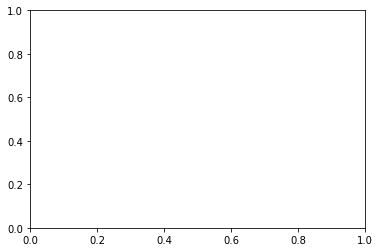

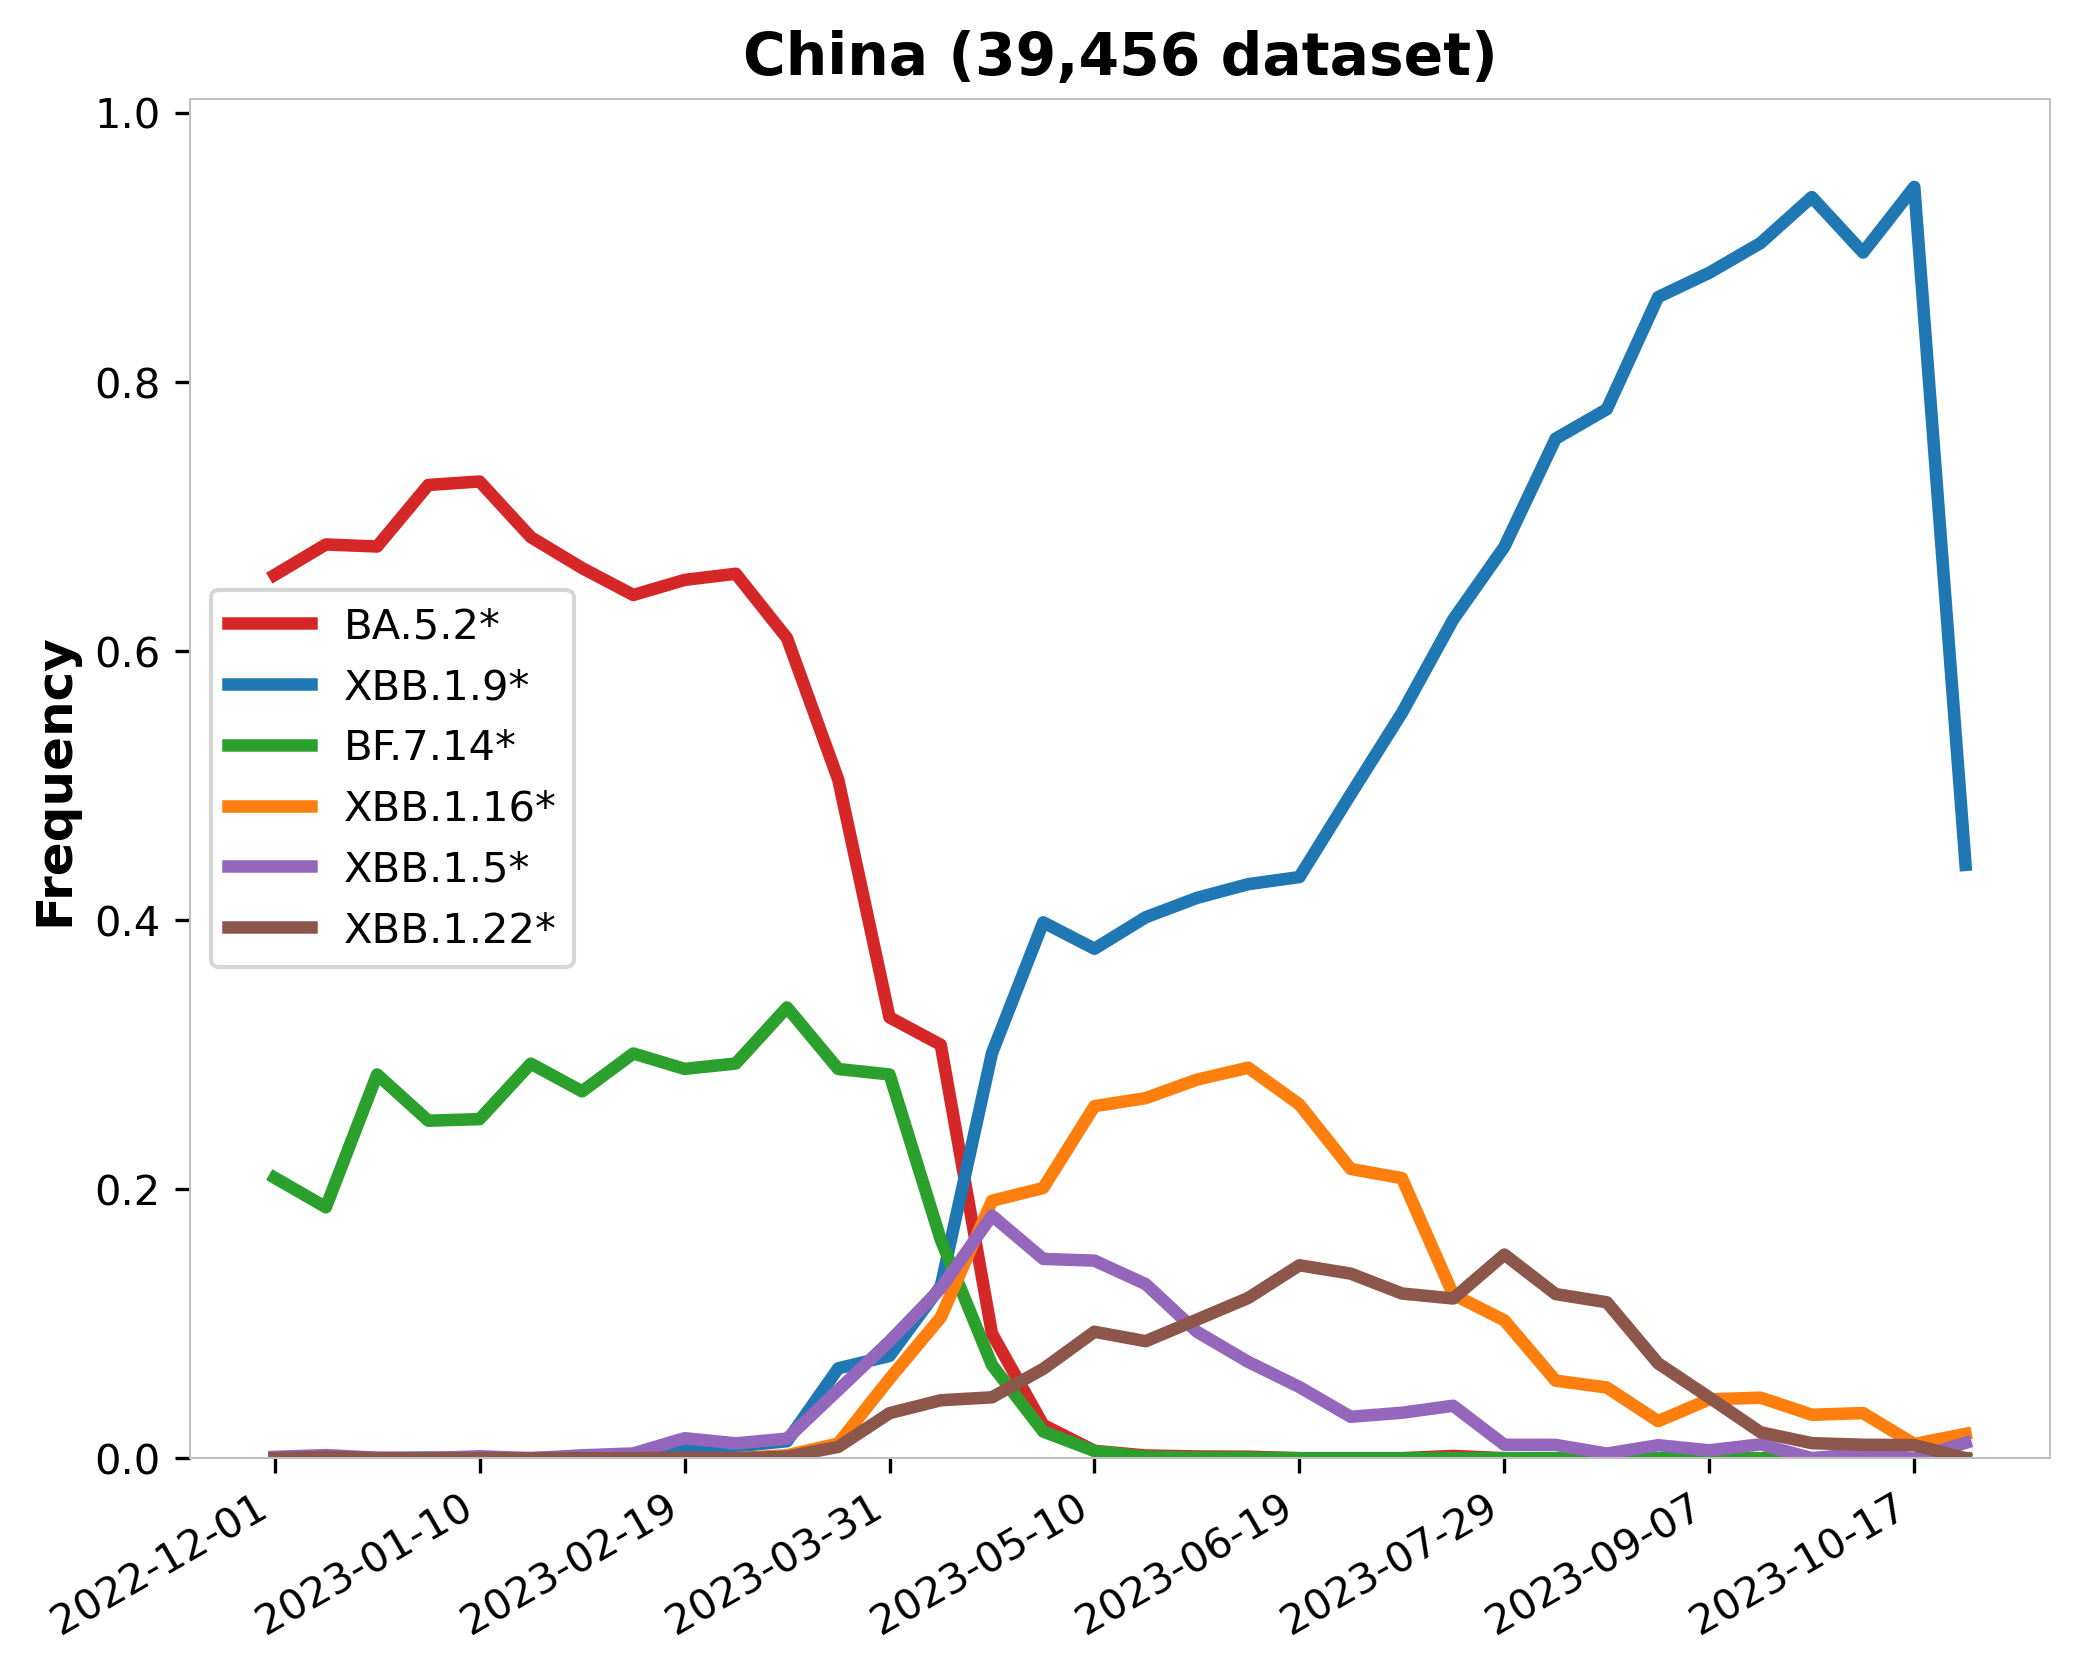

In [45]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
import seaborn as sns

colors = [ "#d62728","#1f77b4",  "#2ca02c", "#ff7f0e","#9467bd", "#8c564b", "#e377c2", "#17becf", "#bcbd22", "#7f7f7f","#800080"]
bwith = 0.5
line_color = "#c0c0c0"

plt.cla()
plt.figure(figsize = [8,6],dpi = 300)
x = array(date_intervals_top4)
k1 = array(df_prop_week[df_prop_week["variant"] == top6_lin[0]]["proportion"].tolist())
k2 = array(df_prop_week[df_prop_week["variant"] == top6_lin[1]]["proportion"].tolist())
k3 = array(df_prop_week[df_prop_week["variant"] == top6_lin[2]]["proportion"].tolist())
k4 = array(df_prop_week[df_prop_week["variant"] == top6_lin[3]]["proportion"].tolist())
k5 = array(df_prop_week[df_prop_week["variant"] == top6_lin[4]]["proportion"].tolist())
k6 = array(df_prop_week[df_prop_week["variant"] == top6_lin[5]]["proportion"].tolist())

plt.plot(x,k1,'-',color = colors[0],label=top6_lin[0],linewidth=3.0)
plt.plot(x,k2,'-',color = colors[1],label=top6_lin[1],linewidth=3.0)
plt.plot(x,k3,'-',color = colors[2],label=top6_lin[2],linewidth=3.0)
plt.plot(x,k4,'-',color = colors[3],label=top6_lin[3],linewidth=3.0)
plt.plot(x,k5,'-',color = colors[4],label=top6_lin[4],linewidth=3.0)
plt.plot(x,k6,'-',color = colors[5],label=top6_lin[5],linewidth=3.0)

plt.title("China (39,456 dataset)",fontweight = "bold",size = 14)
plt.ylim(ymin = 0,ymax = 1.01)
plt.xticks(rotation=30,ha='right')
plt.ylabel('Frequency',fontweight = "bold",size = 12)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(top6_lin)
ax = plt.gca()
bord_line(ax,bwith, line_color)
y = MultipleLocator(200)  
plt.savefig(output_path+"world_covspectrum/Top6_china_"+str(date_intervals_day)+"day.pdf")


In [49]:
# 下载covspectrum的数据，绘制world和china
cov_world = output_path+"world_covspectrum/Top6_World_covspectrum.csv"
df_world = pd.read_csv(cov_world)
for i in df_world.index:
    df_world.loc[i,"variant_short"] = df_world.loc[i,"variant"].split("(")[0].strip()

df_world_final = pd.DataFrame(columns=["date","proportion","variant"])
df_world_final["date"]  = df_world["date"]
df_world_final["proportion"]  = df_world["proportion"]
df_world_final["variant"]  = df_world["variant_short"]
df_world_final.to_csv(output_path+"world_covspectrum/Top6_world.csv",index = None)


In [50]:

dstart, dend = df_world_final['date'].sort_values().values[0], df_world_final['date'].sort_values().values[-1]
date_intervals_top4 = [str(i)[:10] for n, i in enumerate(pd.date_range(dstart, dend)) if n % date_intervals_day == 0]
df_world_final_week = pd.DataFrame(columns=["date","proportion","variant"])
df_world_final_week.date = [val for val in date_intervals_top4 for i in range(len(top6_lin))]
df_world_final_week.variant = top6_lin*len(date_intervals_top4)
for n in range(len(date_intervals_top4)):
    if n != len(date_intervals_top4)-1:
        df_week1 = df_world_final[df_world_final['date'] >= date_intervals_top4[n]]
        df_week2 = df_week1[df_week1['date'] < date_intervals_top4[n+1]]
    else:
        df_week2 = df_world_final[df_world_final['date'] >= date_intervals_top4[n]]
    for lin in top6_lin:
        df_week2_lin = df_week2[df_week2['variant']  == lin]
        for i in df_world_final_week.index:
            if df_world_final_week.loc[i,"variant"] == lin and df_world_final_week.loc[i,"date"] == date_intervals_top4[n]:
                df_world_final_week.loc[i,"proportion"]  = sum(df_week2_lin.proportion)/date_intervals_day

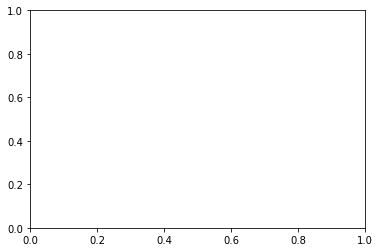

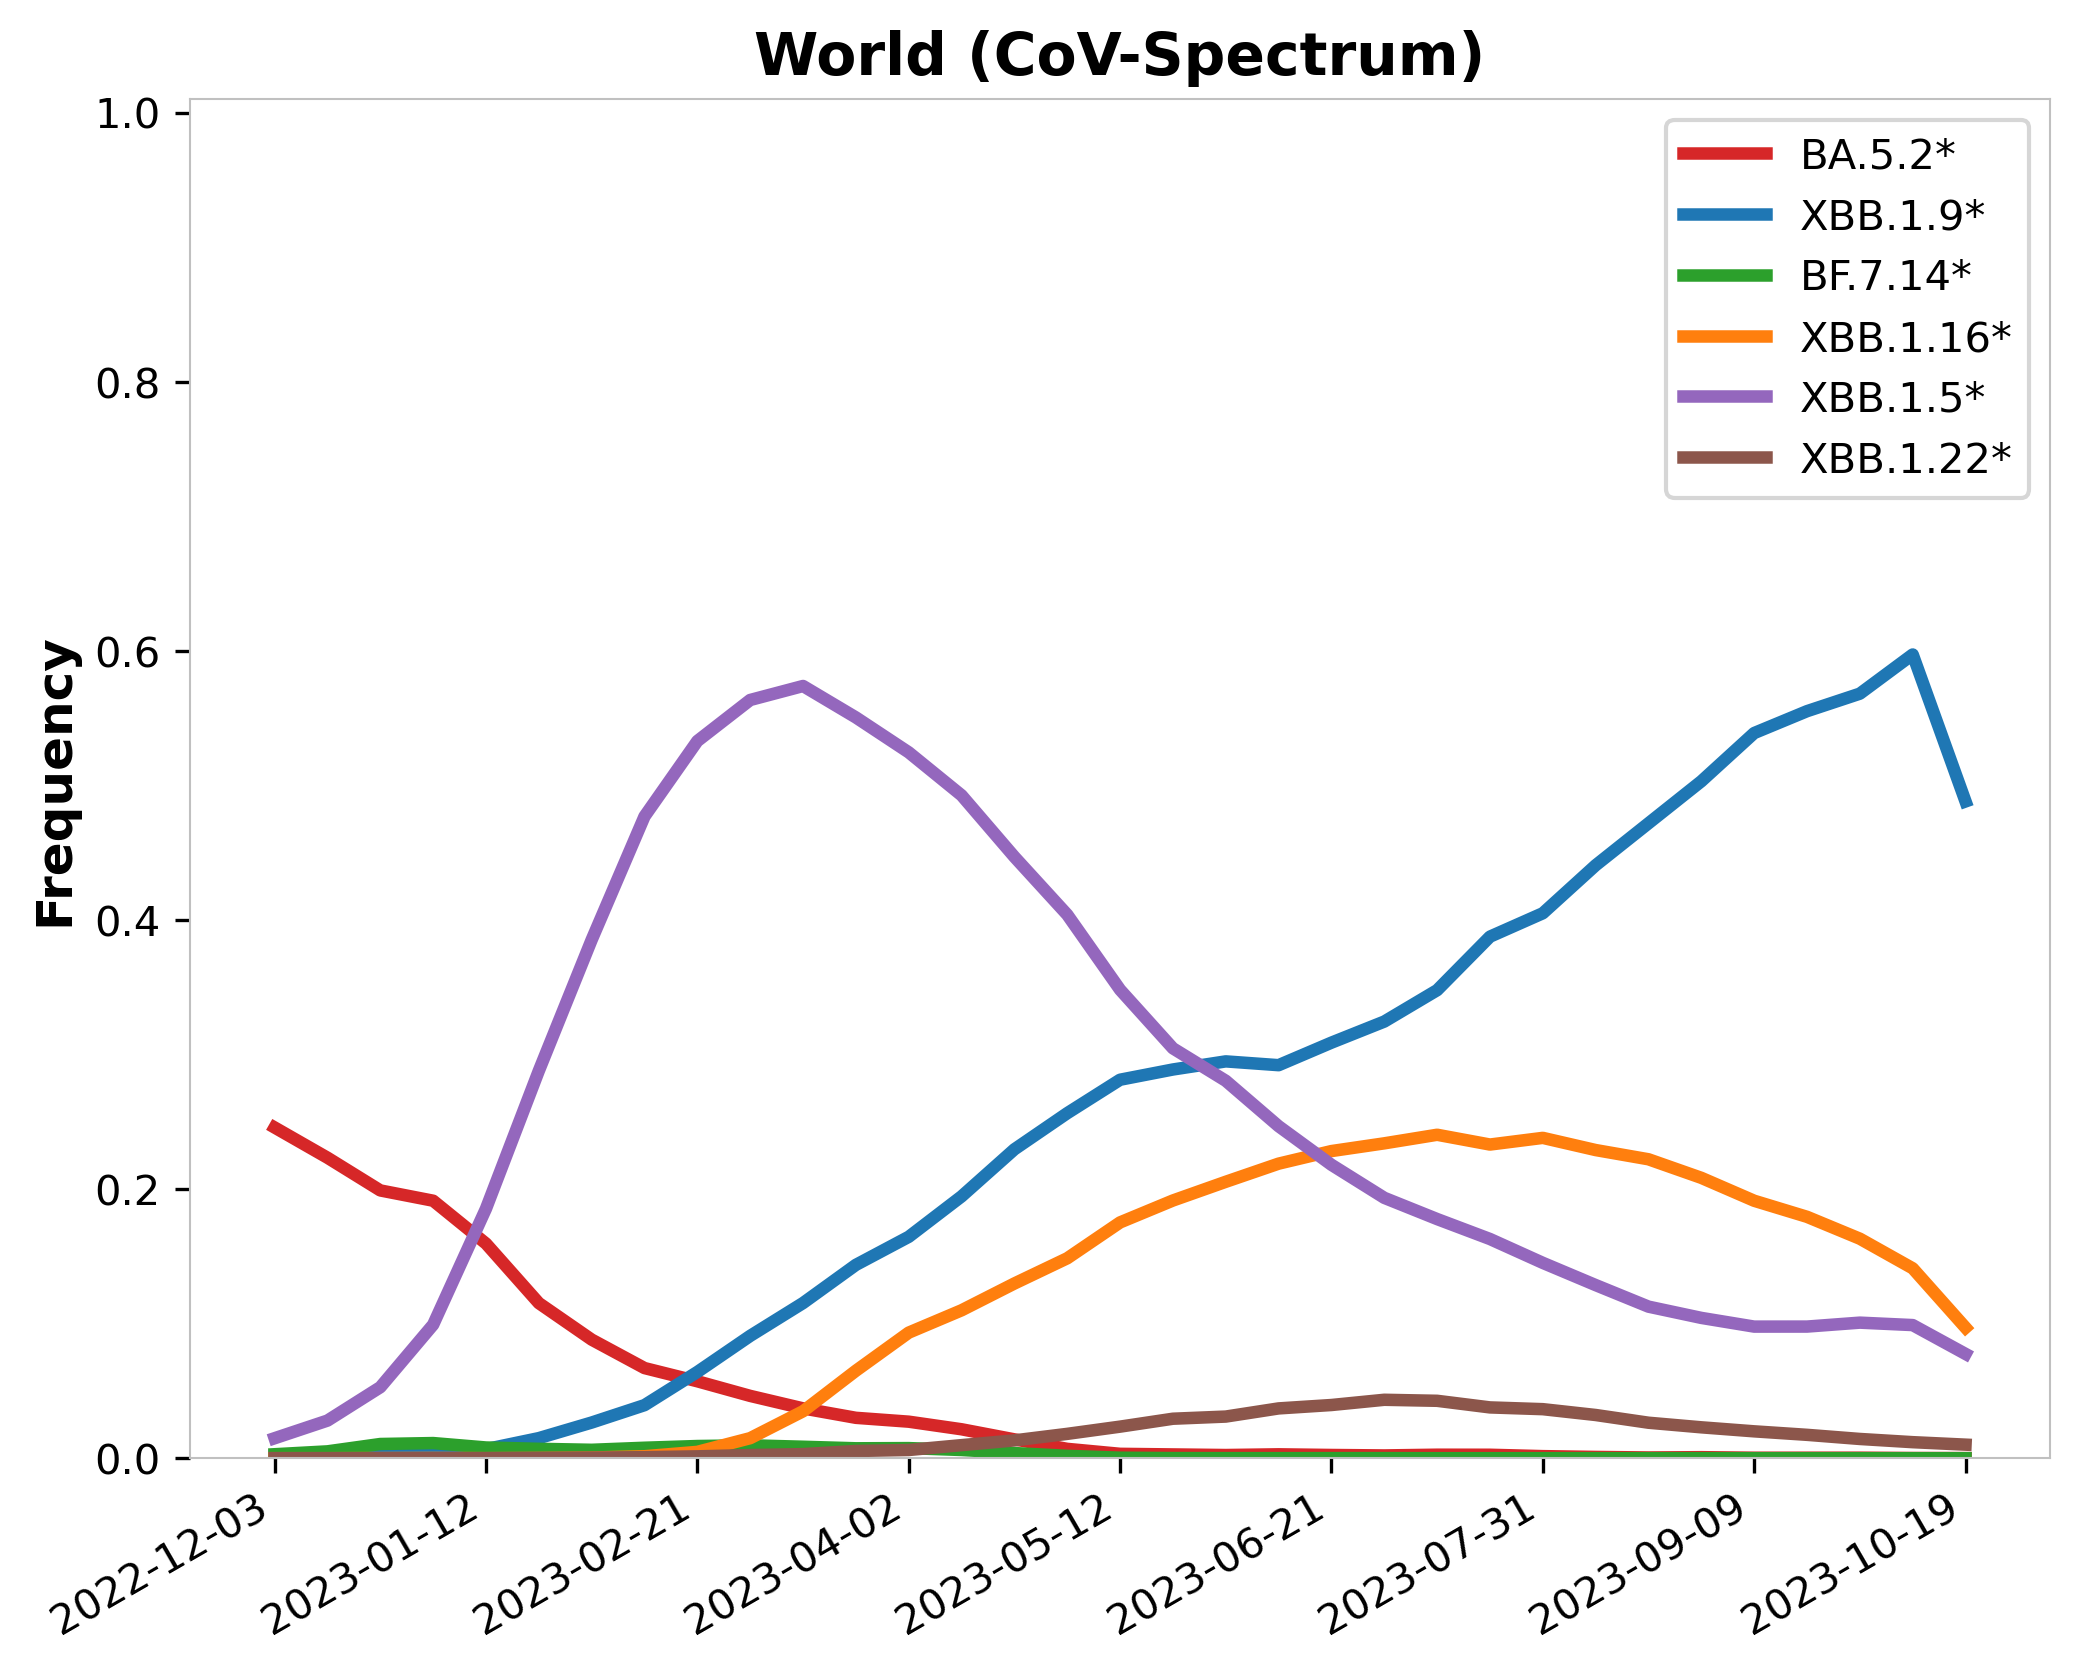

In [52]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
import seaborn as sns

colors = [ "#d62728","#1f77b4",  "#2ca02c", "#ff7f0e","#9467bd", "#8c564b", "#e377c2", "#17becf", "#bcbd22", "#7f7f7f","#800080"]
bwith = 0.5
line_color = "#c0c0c0"

plt.cla()
plt.figure(figsize = [8,6],dpi = 300)
x = array(date_intervals_top4)
k1 = array(df_world_final_week[df_world_final_week["variant"] == top6_lin[0]]["proportion"].tolist())
k2 = array(df_world_final_week[df_world_final_week["variant"] == top6_lin[1]]["proportion"].tolist())
k3 = array(df_world_final_week[df_world_final_week["variant"] == top6_lin[2]]["proportion"].tolist())
k4 = array(df_world_final_week[df_world_final_week["variant"] == top6_lin[3]]["proportion"].tolist())
k5 = array(df_world_final_week[df_world_final_week["variant"] == top6_lin[4]]["proportion"].tolist())
k6 = array(df_world_final_week[df_world_final_week["variant"] == top6_lin[5]]["proportion"].tolist())

plt.plot(x,k1,'-',color = colors[0],label=top6_lin[0],linewidth=3.0)
plt.plot(x,k2,'-',color = colors[1],label=top6_lin[1],linewidth=3.0)
plt.plot(x,k3,'-',color = colors[2],label=top6_lin[2],linewidth=3.0)
plt.plot(x,k4,'-',color = colors[3],label=top6_lin[3],linewidth=3.0)
plt.plot(x,k5,'-',color = colors[4],label=top6_lin[4],linewidth=3.0)
plt.plot(x,k6,'-',color = colors[5],label=top6_lin[5],linewidth=3.0)


plt.title("World (CoV-Spectrum)",fontweight = "bold",size = 14)

plt.ylim(ymin = 0,ymax = 1.01)
plt.xticks(rotation=30,ha='right')
plt.ylabel('Frequency',fontweight = "bold",size = 12)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(top6_lin)
ax = plt.gca()
bord_line(ax,bwith, line_color)
y = MultipleLocator(200)  
plt.savefig(output_path+"world_covspectrum/Top6_world_covspectrum_"+str(date_intervals_day)+"days.pdf")


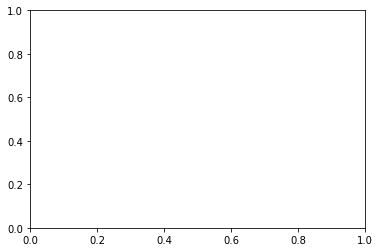

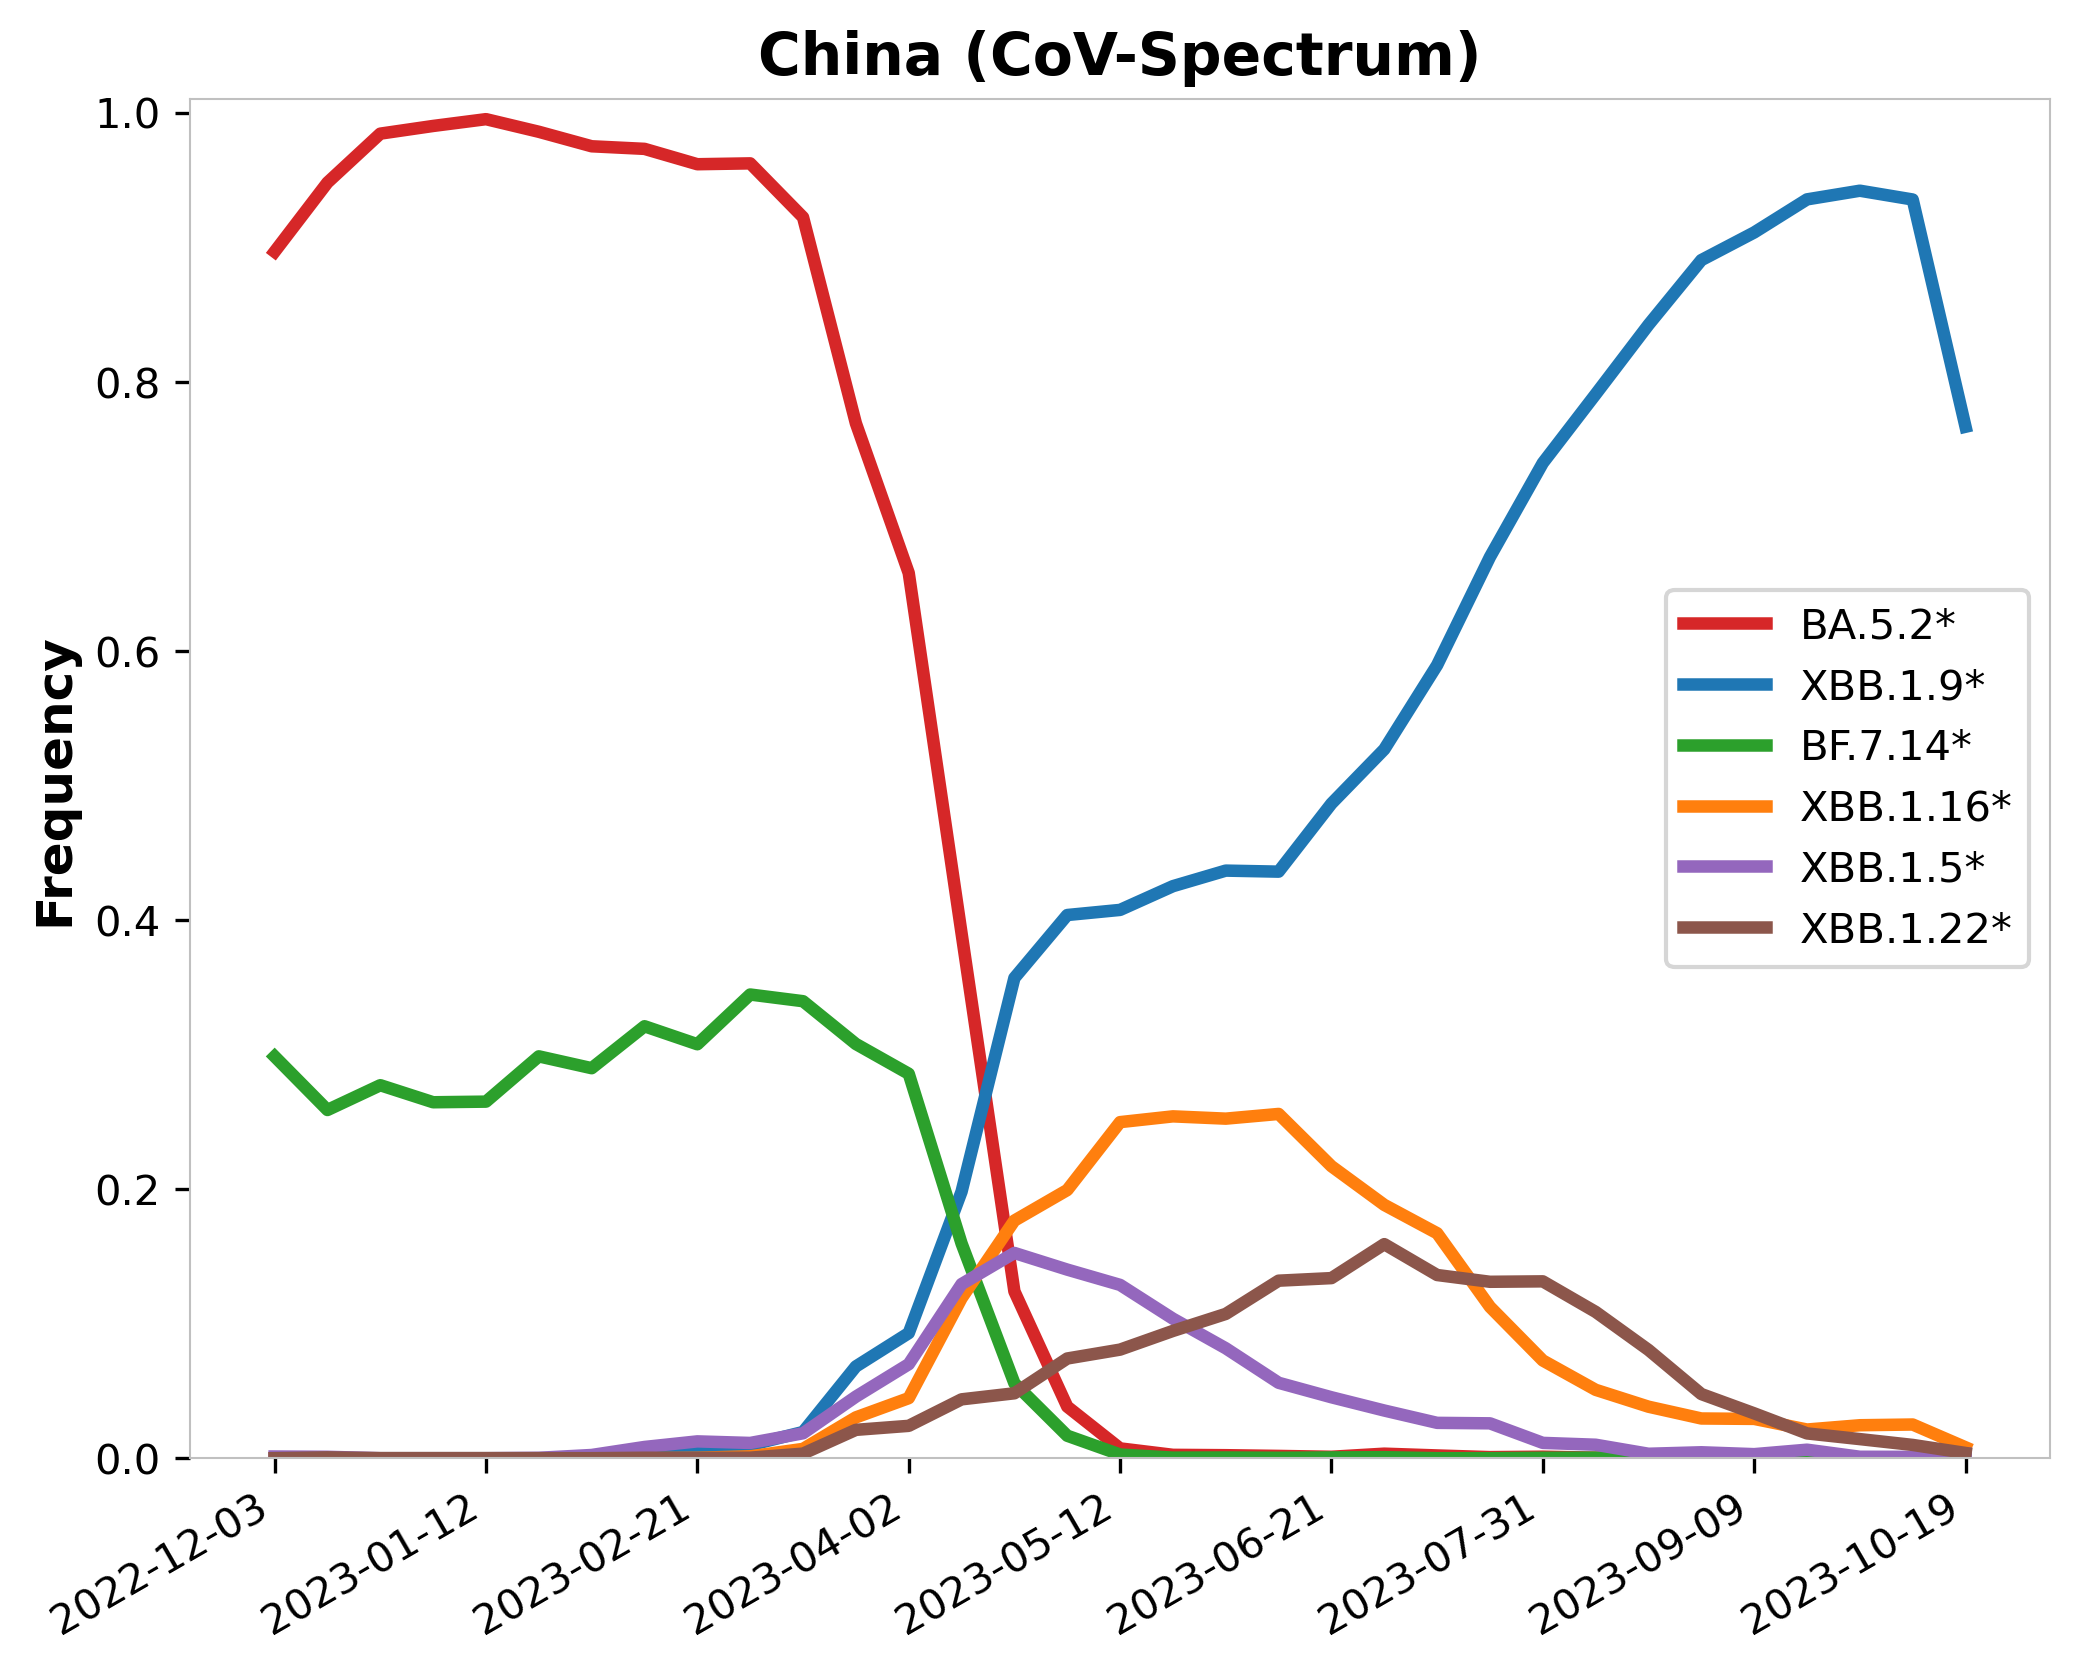

In [54]:
country = "China"
df_world_final = pd.read_csv(output_path+"world_covspectrum/Top6_"+country+"_covspectrum.csv")

dstart, dend = df_world_final['date'].sort_values().values[0], df_world_final['date'].sort_values().values[-1]
date_intervals_top4 = [str(i)[:10] for n, i in enumerate(pd.date_range(dstart, dend)) if n % date_intervals_day == 0]
df_world_final_week = pd.DataFrame(columns=["date","proportion","variant"])
df_world_final_week.date = [val for val in date_intervals_top4 for i in range(len(top6_lin))]
df_world_final_week.variant = top6_lin*len(date_intervals_top4)
for n in range(len(date_intervals_top4)):
    if n != len(date_intervals_top4)-1:
        df_week1 = df_world_final[df_world_final['date'] >= date_intervals_top4[n]]
        df_week2 = df_week1[df_week1['date'] < date_intervals_top4[n+1]]
    else:
        df_week2 = df_world_final[df_world_final['date'] >= date_intervals_top4[n]]
    for lin in top6_lin:
        df_week2_lin = df_week2[df_week2['variant']  == lin]
        for i in df_world_final_week.index:
            if df_world_final_week.loc[i,"variant"] == lin and df_world_final_week.loc[i,"date"] == date_intervals_top4[n]:
                df_world_final_week.loc[i,"proportion"]  = sum(df_week2_lin.proportion)/date_intervals_day

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
import seaborn as sns

colors = [ "#d62728","#1f77b4",  "#2ca02c", "#ff7f0e","#9467bd", "#8c564b", "#e377c2", "#17becf", "#bcbd22", "#7f7f7f","#800080"]
bwith = 0.5
line_color = "#c0c0c0"

plt.cla()
plt.figure(figsize = [8,6],dpi = 300)
x = array(date_intervals_top4)#点的横坐标
k1 = array(df_world_final_week[df_world_final_week["variant"] == top6_lin[0]]["proportion"].tolist())#线1的纵坐标
k2 = array(df_world_final_week[df_world_final_week["variant"] == top6_lin[1]]["proportion"].tolist())#线2的纵坐标
k3 = array(df_world_final_week[df_world_final_week["variant"] == top6_lin[2]]["proportion"].tolist())#线2的纵坐标
k4 = array(df_world_final_week[df_world_final_week["variant"] == top6_lin[3]]["proportion"].tolist())#线2的纵坐标
k5 = array(df_world_final_week[df_world_final_week["variant"] == top6_lin[4]]["proportion"].tolist())#线2的纵坐标
k6 = array(df_world_final_week[df_world_final_week["variant"] == top6_lin[5]]["proportion"].tolist())#线2的纵坐标

plt.plot(x,k1,'-',color = colors[0],label=top6_lin[0],linewidth=3.0)
plt.plot(x,k2,'-',color = colors[1],label=top6_lin[1],linewidth=3.0)
plt.plot(x,k3,'-',color = colors[2],label=top6_lin[2],linewidth=3.0)
plt.plot(x,k4,'-',color = colors[3],label=top6_lin[3],linewidth=3.0)
plt.plot(x,k5,'-',color = colors[4],label=top6_lin[4],linewidth=3.0)
plt.plot(x,k6,'-',color = colors[5],label=top6_lin[5],linewidth=3.0)

plt.title(country+" (CoV-Spectrum)",fontweight = "bold",size = 14)
plt.ylim(ymin = 0,ymax = 1.01)
plt.xticks(rotation=30,ha='right')
plt.ylabel('Frequency',fontweight = "bold",size = 12)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(top6_lin)
ax = plt.gca()
bord_line(ax,bwith, line_color)
y = MultipleLocator(200)  

plt.savefig(output_path+"world_covspectrum/Top6_"+country+"_covspectrum_"+str(date_intervals_day)+"days.pdf")
